In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
dataset= pd.read_csv('dummy.csv')

In [4]:
dataset

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [22]:
# Algorithm only works on numbers
# and here attendence column is in categorical value, so we will first convert it into numerical value 
# .map is used to convert categorical value into numerical value

In [23]:
dataset['Attendance']= dataset['Attendance'].map({'Yes':1, 'No':0})

In [24]:
dataset

,SAT,GPA,Attendance
0,1714,2.40,NaN
1,1664,2.52,NaN
2,1760,2.54,NaN
3,1685,2.74,NaN
4,1693,2.83,NaN
...,...,...,...
79,1936,3.71,NaN
80,1810,3.71,NaN
81,1987,3.73,NaN
82,1962,3.76,NaN


In [25]:
x= dataset[['SAT','Attendance']]

In [26]:
x

,SAT,Attendance
0,1714,NaN
1,1664,NaN
2,1760,NaN
3,1685,NaN
4,1693,NaN
...,...,...
79,1936,NaN
80,1810,NaN
81,1987,NaN
82,1962,NaN


In [27]:
y= dataset['GPA']

In [28]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [29]:
import statsmodels.api as sm

In [30]:
x1= sm.add_constant(x)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
x1

,const,SAT,Attendance
0,1.0,1714,NaN
1,1.0,1664,NaN
2,1.0,1760,NaN
3,1.0,1685,NaN
4,1.0,1693,NaN
...,...,...,...
79,1.0,1936,NaN
80,1.0,1810,NaN
81,1.0,1987,NaN
82,1.0,1962,NaN


In [32]:
model=sm.OLS(y,x1).fit()

MissingDataError: exog contains inf or nans

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.19e-15
Time:                        22:20:30   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y_hat_0= 0.6439+0.0014*dataset['SAT']
y_hat_1= 0.6439+0.0014*dataset['SAT']+0.2226

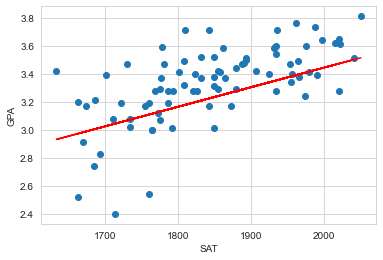

In [43]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_0,color=('red'))
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

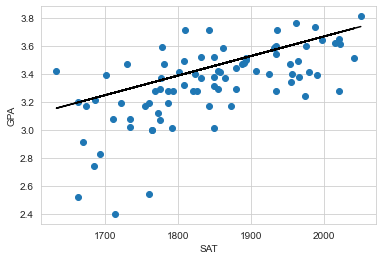

In [42]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_1,color=('black'))
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

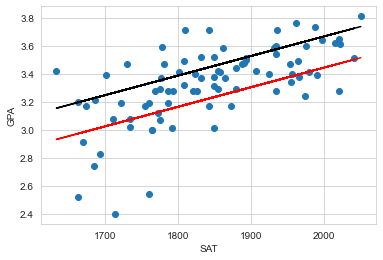

In [41]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.plot(dataset['SAT'],y_hat_0,color=('red'))
plt.plot(dataset['SAT'],y_hat_1,color=('black'))
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()